In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyDOE import lhs
from scipy.stats import norm

# Problem 1 (40 pts)

Grading Scheme:

-3 for any incorrect/missing plots of N = 500, M = 8 basis (4 total)

-3 for any incorrect/missing plots of N = 500, M = 4 basis (4 total)

-3 for any incorrect/missing plots of N = 500, M = 4 features  (4 total)

-4 if no sort of commentary/qualitative comments

In [2]:
class BayesianLinearRegression:
    def __init__(self, X, y, alpha = 1.0, beta = 1.0):
        self.X = X
        self.y = y
        self.alpha = alpha
        self.beta = beta
        self.jitter = 1e-8
      
    def fit_MLE(self): 
        xTx_inv = np.linalg.inv(np.matmul(self.X.T,self.X) + self.jitter)
        xTy = np.matmul(self.X.T, self.y)
        w_MLE = np.matmul(xTx_inv, xTy)
        self.w_MLE = w_MLE
        return w_MLE

    def fit_MAP(self): 
        Lambda = np.matmul(self.X.T,self.X) + (self.beta/self.alpha)*np.eye(self.X.shape[1])
        Lambda_inv = np.linalg.inv(Lambda)
        xTy = np.matmul(self.X.T, self.y)
        mu = np.matmul(Lambda_inv, xTy)
        self.w_MAP = mu
        self.Lambda_inv = Lambda_inv
        return mu, Lambda_inv
      
    def predictive_distribution(self, X_star):
        mean_star = np.matmul(X_star, self.w_MAP)
        var_star = 1.0/self.alpha + np.matmul(X_star, np.matmul(self.Lambda_inv, X_star.T))
        return mean_star, var_star

In [3]:
#N = 500, M = 8

# N is the number of training points.
N = 500
M = 8
noise_var = 0.2
alpha = 1.0/noise_var
beta = 0.1

def feature_1(X, M):
    return X

def feature_2(X, M):
    N = X.shape[0]
    M = M + 1
    output = np.zeros((N,M))
    for i in range(M):
        output[:,i:i+1] = X ** i
    return output

def feature_3(X, M):
    N = X.shape[0]
    output = np.zeros((N,2*M))
    for i in range(M):
        output[:,2*i:2*i+1] = np.sin(i*np.pi*X)
        output[:,2*i+1:2*i+2] = np.cos(i*np.pi*X)
    return output   

def feature_4(X, M):
    N = X.shape[0]
    output = np.zeros((N,M))
    for i in range(M):
        infer = np.polynomial.legendre.Legendre.basis(i, [0, 2.])
        output[:,i:i+1] = infer(X)
    return output    

# Create random input and output data
X = 2 * lhs(1, N)

X = np.sort(X)
y = np.exp(X) * np.sin(2*np.pi*X) + 0.5*np.random.randn(N,1)

X_1 = feature_1(X, M)
X_2 = feature_2(X, M)
X_3 = feature_3(X, M)
X_4 = feature_4(X, M)

(500, 1)
(500, 500)
(100, 500)


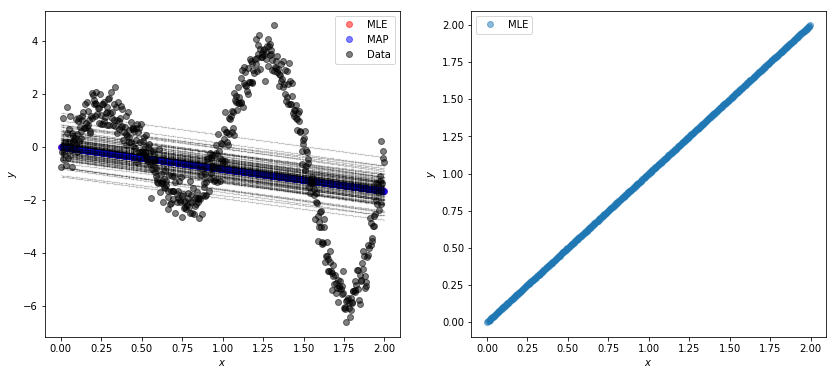

In [4]:
#Identity Basis

X_input = X_1

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()

# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

(500, 1)
(500, 500)
(100, 500)


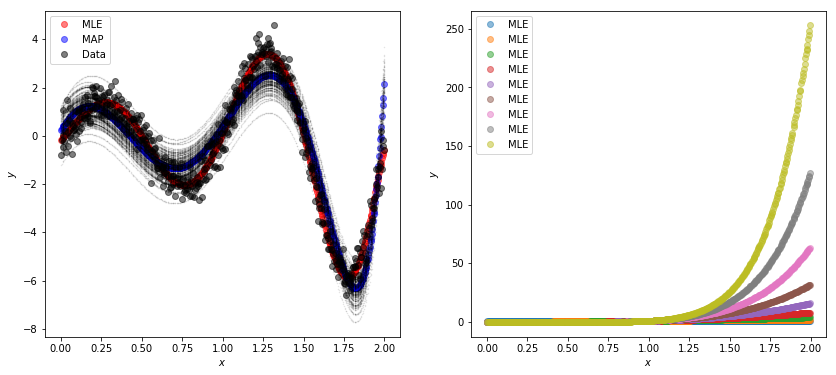

In [5]:
#Monomial Basis

X_input = X_2

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

(500, 1)
(500, 500)
(100, 500)


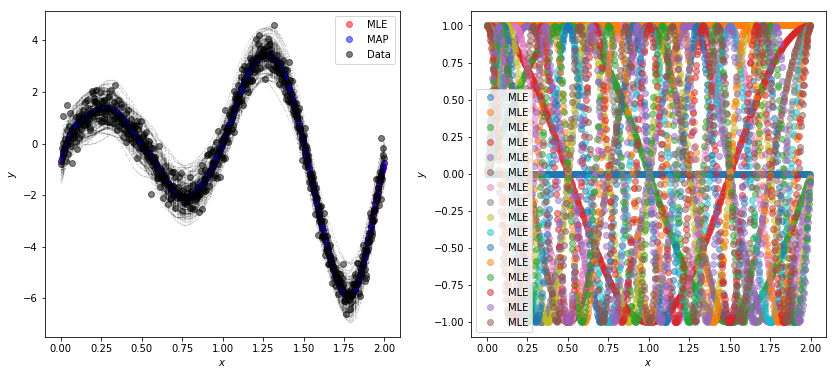

In [6]:
#Fourier Basis

X_input = X_3

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

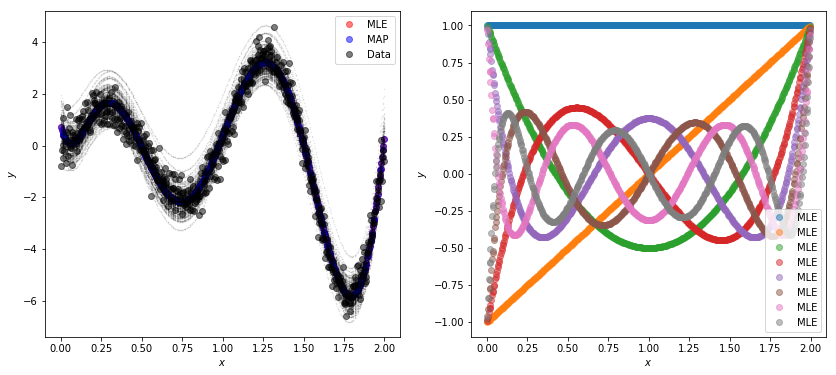

In [7]:
#Legendre Basis

X_input = X_4

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

#print(mean_star.shape)
#print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
#print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [8]:
#N = 500, M = 4

# N is the number of training points.
N = 500
M = 4
noise_var = 0.2
alpha = 1.0/noise_var
beta = 0.1

# Create random input and output data
X = 2 * lhs(1, N)

X = np.sort(X)
y = np.exp(X) * np.sin(2*np.pi*X) + 0.5*np.random.randn(N,1)

X_1 = feature_1(X, M)
X_2 = feature_2(X, M)
X_3 = feature_3(X, M)
X_4 = feature_4(X, M)

(500, 1)
(500, 500)
(100, 500)


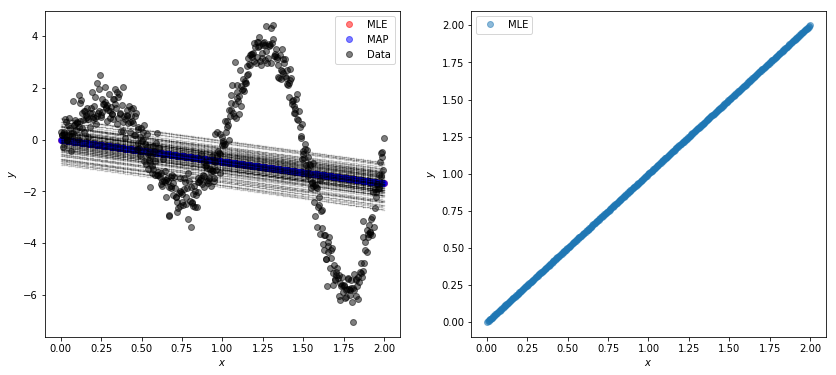

In [9]:
#Identity Basis

X_input = X_1

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

(500, 1)
(500, 500)
(100, 500)


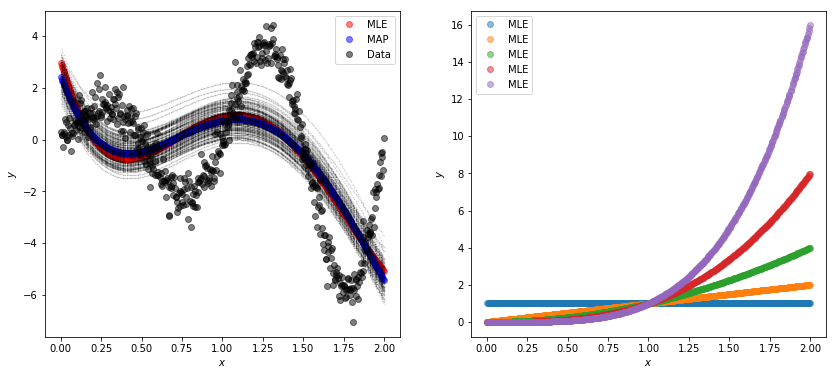

In [10]:
#Monomial Basis

X_input = X_2

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

(500, 1)
(500, 500)
(100, 500)


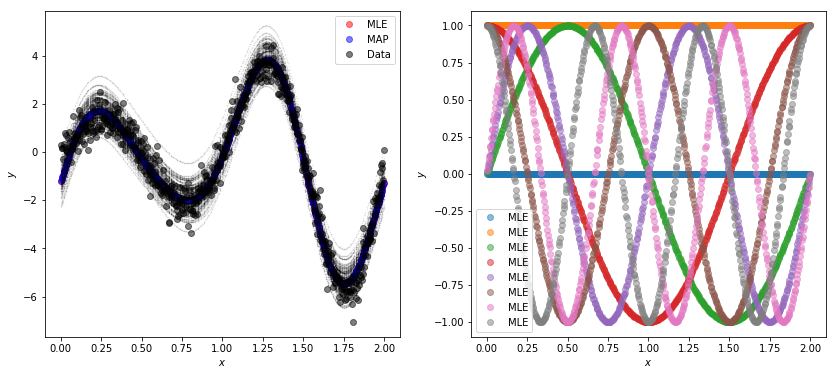

In [11]:
#Fourier Basis

X_input = X_3

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

(500, 1)
(500, 500)
(100, 500)


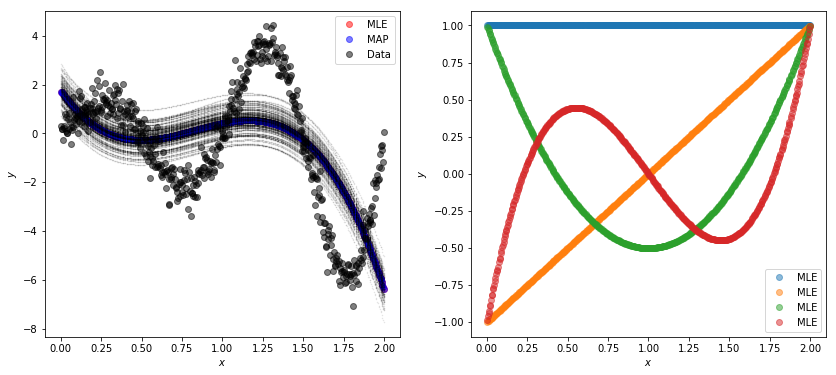

In [12]:
#Legendre Basis

X_input = X_4

# Define model
m = BayesianLinearRegression(X_input, y, alpha, beta)

# Fit MLE and MAP estimates for w
w_MLE = m.fit_MLE()
w_MAP, Lambda_inv = m.fit_MAP()


# Predict at a set of test points
X_star = X#np.linspace(0,2.,200)[:,None]
y_pred_MLE = np.matmul(X_input, w_MLE)
y_pred_MAP = np.matmul(X_input, w_MAP)

# Draw sampes from the predictive posterior
num_samples = 500
nn = 100
mean_star, var_star = m.predictive_distribution(X_input)

print(mean_star.shape)
print(var_star.shape)
samples = np.random.multivariate_normal(mean_star.flatten(), var_star, nn)
print(samples.shape)

# Plot
plt.figure(1, figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(X_star, y_pred_MLE, 'ro', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.plot(X_star, y_pred_MAP, 'bo', linewidth=2.0, label = 'MAP', alpha = 0.5)
for i in range(0, nn):
    plt.plot(X_star, samples[i,:].T, 'k.', alpha=0.1, markersize = 1.)
plt.plot(X,y,'ko', label = 'Data', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

# Plot distribution of w
plt.subplot(1,2,2)
plt.plot(X, X_input, 'o', linewidth=2.0, label = 'MLE', alpha = 0.5)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()


For Fourier basis and Legendre basis, the accuracy grow with M increase. But identity feature does not change with M. The monomial basis is sensitive to the M index. Basicly speaking large M will cause overfitting. Legendre basis is the most outstanding one because it is orthogonal in the problem interval, while the others are not having this property. 

# Question 2 (40 pts)

Grading Scheme:

-8 for each parts (1)-(5), partial credit where applicable

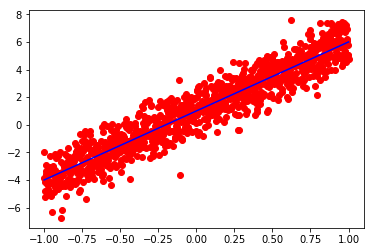

In [13]:
N = 1000
sigma = 1
x_train = np.linspace(-1, 1, N)[:,None]
noise = np.random.normal(0, sigma, N)[:,None]
y_train = 5* x_train + 1 + noise
y_true = 5*x_train + 1

plt.plot(x_train, y_train, 'ro')
plt.plot(x_train, y_true, 'b-')

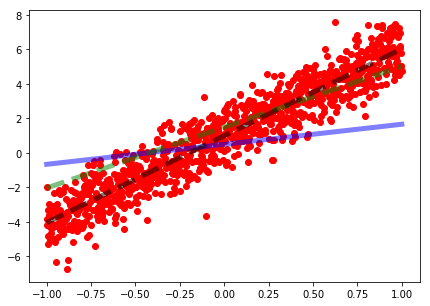

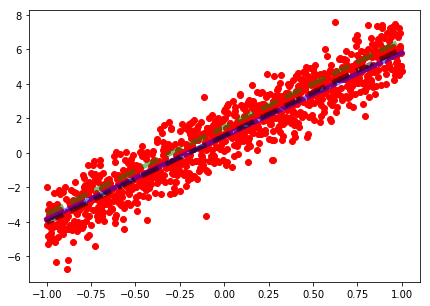

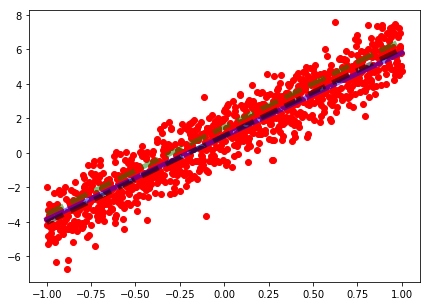

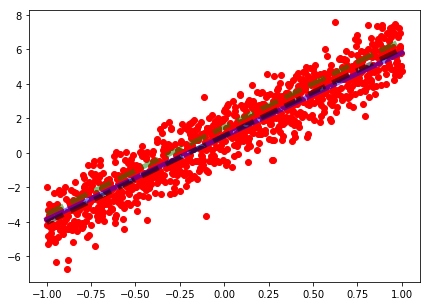

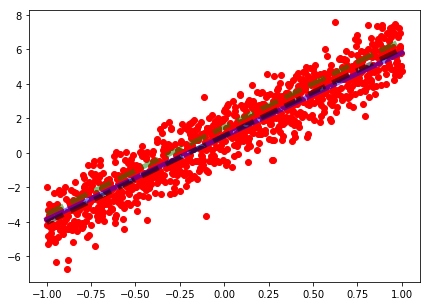

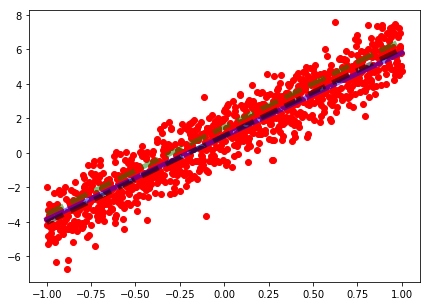

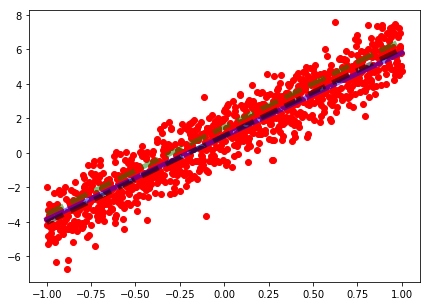

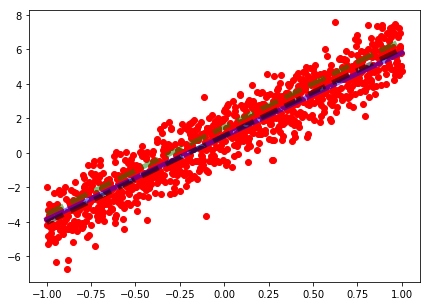

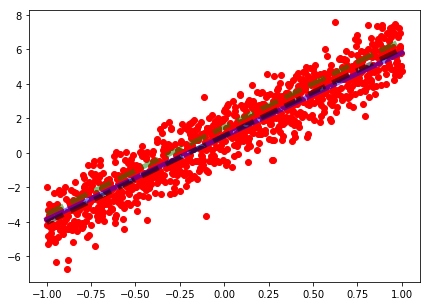

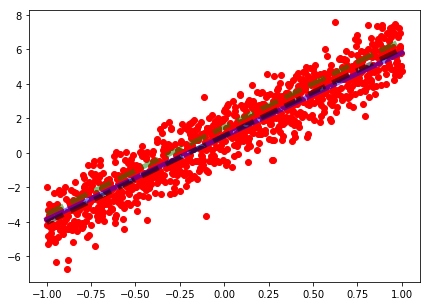

In [14]:
#Parts (1) and (2) 

def compute_loss(theta, x, y):
    alpha = theta[0]
    beta = theta[1]
    return np.sum((x * alpha + beta - y)**2/2/sigma**2)

def compute_gradient(theta, x, y):
    alpha = theta[0]
    beta = theta[1]
    alpha_grad = np.sum((alpha * x + beta - y)*x)
    beta_grad = np.sum((alpha * x + beta - y))
    return np.hstack((alpha_grad, beta_grad))/sigma**2

def compute_F(theta, x, y):
    alpha = theta[0]
    beta = theta[1]
    F = np.zeros((2, 2))
    F[0, 0] = np.sum((alpha * x + beta - y)**2*x**2)
    F[0, 1] = np.sum((alpha * x + beta - y)**2*x)
    F[1, 0] = np.sum((alpha * x + beta - y)**2*x)
    F[1, 1] = np.sum((alpha * x + beta - y)**2)
    return F/sigma**4/N

def compute_H(theta, x, y):
    x = np.hstack((x, np.ones_like(x)))
    H = np.matmul(np.transpose(x), x)
    return H/sigma**2

theta_NGD = np.ones((2, 1)) * (0.5)
theta_GD = np.ones((2, 1)) * (0.5)
theta_N = np.ones((2, 1)) * (0.5)

T = 2000
learning_rate = 0.002
learning_rate_GD = 0.002

Theta_list_NGD = []
Theta_list_GD = []
Theta_list_N = []

Loss_list_NGD = []
Loss_list_GD = []
Loss_list_N = []

Theta_list_NGD.append(theta_NGD)
Theta_list_GD.append(theta_GD)
Theta_list_N.append(theta_N)

for k in range(T):
    Gradient_NGD = compute_gradient(theta_NGD, x_train, y_train)[:,None]
    Fisher_NGD = compute_F(theta_NGD, x_train, y_train)
    theta_NGD = theta_NGD - learning_rate * np.matmul(np.linalg.inv(Fisher_NGD), Gradient_NGD)
    
    Gradient_GD = compute_gradient(theta_GD, x_train, y_train)[:,None]
    theta_GD = theta_GD - learning_rate_GD * Gradient_GD

    Gradient_N = compute_gradient(theta_N, x_train, y_train)[:,None]
    Hessian = compute_H(theta_N, x_train, y_train)
    theta_N = theta_N - np.matmul(np.linalg.inv(Hessian), Gradient_N)
    
    Theta_list_NGD.append(theta_NGD)
    Theta_list_GD.append(theta_GD)
    Theta_list_N.append(theta_N)
    
    Loss_NGD = compute_loss(theta_NGD, x_train, y_train)
    Loss_GD = compute_loss(theta_GD, x_train, y_train)
    Loss_N = compute_loss(theta_N, x_train, y_train)
    
    Loss_list_NGD.append(Loss_NGD)
    Loss_list_GD.append(Loss_GD)
    Loss_list_N.append(Loss_N)

    if k % 200 == 0:         
        ax = plt.figure(k,figsize=(7,5))
        plt.plot(x_train, y_train, 'ro')
        plt.plot(x_train, x_train * theta_NGD[0] + theta_NGD[1], 'b-', linewidth = 5, alpha = 0.5)
        plt.plot(x_train, x_train * theta_GD[0] + theta_GD[1], 'g--', linewidth = 5, alpha = 0.5)
        plt.plot(x_train, x_train * theta_N[0] + theta_N[1], 'k--', linewidth = 5, alpha = 0.5)

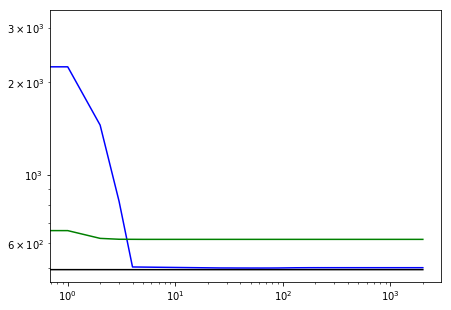

In [15]:
ax = plt.figure(-10,figsize=(7,5))
plt.plot(Loss_list_NGD, 'b')
plt.plot(Loss_list_GD, 'g')
plt.plot(Loss_list_N, 'k')
plt.yscale("log")
plt.xscale("log")

(3)  

$$F = \mathbb{E}_{p(x|\theta)}[\nabla_{\theta}\log p(x|\theta)\nabla_{\theta}\log p(x|\theta)^T]$$

$$\nabla_{\theta} \log p(x | \theta) = \dfrac{\nabla_{\theta} p(x | \theta)}{p(x | \theta)}$$

$$
\begin{aligned}
H_{\log p(x | \theta)} 
&= \nabla_{\theta} (\nabla_{\theta} \log p(x | \theta)) \\ 
&= \nabla_{\theta} (\dfrac{\nabla_{\theta} p(x | \theta)}{p(x | \theta)}) \\
&= \dfrac{H_{p(x | \theta)} p(x | \theta) - \nabla_{\theta} p(x | \theta) \nabla_{\theta} p(x | \theta) ^ T}{p^2(x | \theta)} \\
&= \dfrac{H_{p(x | \theta)}} {p(x | \theta)} - \nabla_{\theta}\log p(x|\theta)\nabla_{\theta}\log p(x|\theta)^T
\end{aligned}
$$

$$
\begin{aligned}
- \mathbb{E}_{p(x|\theta)} \left[ H_{\log p(x | \theta)} \right] 
&= - \mathbb{E}_{p(x|\theta)} \left[ \dfrac{H_{p(x | \theta)}} {p(x | \theta)} - \nabla_{\theta}\log p(x|\theta)\nabla_{\theta}\log p(x|\theta)^T \right] \\
&= - \mathbb{E}_{p(x|\theta)} \left[ \dfrac{H_{p(x | \theta)}} {p(x | \theta)} \right] + \mathbb{E}_{p(x|\theta)} \left[ \nabla_{\theta}\log p(x|\theta)\nabla_{\theta}\log p(x|\theta)^T \right] \\
&= - \int \dfrac{H_{p(x | \theta)}}{p(x | \theta)} p(x | \theta) dx + F \\
&= - \int H_{p(x | \theta)}dx + F \\
&= - \nabla_{\theta}^2 \int p(x | \theta) dx + F \\
&= 0 + F = F \\
\end{aligned}
$$  

(4)  

$$
\begin{aligned}
KL [p(x | \theta) \| p(x | \theta^{\prime})]
&= \mathbb{E}_{p(x|\theta)}[\log p(x | \theta)]- \mathbb{E}_{p(x|\theta)}[\log p(x | \theta^{\prime})]
\end{aligned}
$$

$$
\begin{aligned}
H_{KL [p(x | \theta) \| p(x | \theta^{\prime})]}
&= \nabla_{\theta_{\prime}}^2 KL [p(x | \theta) \| p(x | \theta^{\prime})] \\
&= \nabla_{\theta_{\prime}}^2\mathbb{E}_{p(x|\theta)}[\log p(x | \theta)] - \nabla_{\theta_{\prime}}^2\mathbb{E}_{p(x|\theta)}[\log p(x | \theta^{\prime})] \\
&= 0 - \mathbb{E}_{p(x|\theta)}[\nabla_{\theta_{\prime}}^2\log p(x | \theta^{\prime})] \\
&= - \int (\nabla_{\theta_{\prime}}^2\log p(x | \theta^{\prime})) p(x|\theta) dx \\
&= - \int H_{\log p(x | \theta^{\prime})} p(x|\theta) dx
\end{aligned}
$$

$$
\begin{aligned}
H_{KL [p(x | \theta) \| p(x | \theta^{\prime})]} \big|_{\theta^{\prime} = \theta}
&= - \int H_{\log p(x | \theta^{\prime})}\big|_{\theta^{\prime} = \theta} p(x|\theta) dx \\
&= - \int H_{\log p(x | \theta)} p(x|\theta) dx \\
&= - \mathbb{E}_{p(x|\theta)} [ H_{\log p(x | \theta)} ]  \\
&= F
\end{aligned}
$$  

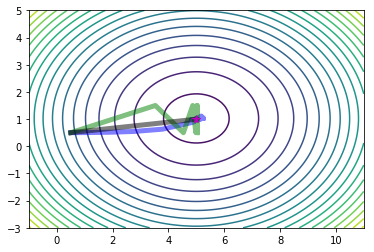

In [16]:
#Part (5)

param1 = np.linspace(-1., 11., 100)[:,None]
param2 = np.linspace(-3., 5., 100)[:,None]
P1, P2 = np.meshgrid(param1, param2)
Result = np.zeros_like(P1)

for k in range(100):
    for q in range(100):
        param = np.hstack((param1[k], param2[q]))
        Result[k, q] = compute_loss(param, x_train, y_train)
        
Theta_list_NGD = np.asarray(Theta_list_NGD)
Theta_list_GD = np.asarray(Theta_list_GD)
Theta_list_N = np.asarray(Theta_list_N)

plt.contour(P1, P2, Result, 20)
plt.plot(Theta_list_NGD[:,0], Theta_list_NGD[:, 1], 'b', linewidth = 5, alpha = 0.5)
plt.plot(Theta_list_GD[:,0], Theta_list_GD[:, 1], 'g', linewidth = 5, alpha = 0.5)
plt.plot(Theta_list_N[:,0], Theta_list_N[:, 1], 'k', linewidth = 5, alpha = 0.5)
plt.plot(5, 1, 'm*', linewidth = 5, markersize = 8)

# Problem 3 (20 pts)

Grading Scheme:

-6, for each completely incorrect posterior distribution (-3 if correct approach but wrong answer, -1 if almost correct)

-2, for no qualitative comments

NOTE: replace $w_1$ and $w_0$ with $\alpha$ and $\beta$, respectively

Gibbs sampling Derivation
\begin{align}
p(y| x, w_0, w_1, \gamma) &= \prod\mathcal{N}(y_{i}| w_0 + w_1x_i, \gamma^{-1}) = (\frac{\gamma}{2\pi})^{N/2}\exp(-\frac{\gamma}{2}(y - xw)^{T}(y - xw))\\
p(w) &= \mathcal{N}(0,1) = \frac{1}{\sqrt{2\pi}}^2\exp(-\frac{w^Tw}{2})\\
p(\gamma) &= Gam(\gamma| 2, 1) = \gamma\exp(\gamma) = \gamma\exp(-\gamma)\\
\end{align}

Posterior and log posterior follow:
\begin{align}
p(\gamma, w_0, w_1| x, y) &\varpropto p(y| x, w_0, w_1, \gamma) p(w) p(\gamma) \\
&\varpropto (\frac{\gamma}{2\pi})^{N/2}\exp(-\frac{\gamma}{2}(y - xw)^{T}(y - xw))\exp(-\frac{w^Tw}{2})\gamma\exp(-\gamma)\\
\log p(\gamma, w_0, w_1| x, y) &= \frac{N}{2}\log(\gamma) - \frac{w_0^2}{2} - \frac{w_1^2}{2} + \log(\gamma) - \gamma - \frac{\gamma}{2}(y - xw)^{T}(y - xw) + C\\
& = \frac{N+2}{2}\log(\gamma) - \gamma - \frac{\gamma}{2}(y - xw)^{T}(y - xw) - \frac{w^Tw}{2} + C\\
\end{align}


The log conditional distributions follow:
\begin{align}
\log p(w_0| x, y, w_1, \gamma) &= -\frac{\gamma}{2}\sum_{i = 1}^{N}(y_i - w_0 - w_1x_i)^2 - \frac{w_0^2}{2}\\
\log p(w_1| x, y, w_0, \gamma) &= -\frac{\gamma}{2}\sum_{i = 1}^{N}(y_i - w_0 - w_1x_i)^2 - \frac{w_1^2}{2}\\
\log p(\gamma| x, y, w_0, w_1) &= \frac{N + 2}{2}\log(\gamma) - \gamma - \frac{\gamma}{2}\sum_{i = 1}^{N}(y_i - w_0 - w_1x_i)^2\\
\end{align}

Gaussian distribution for $w_0$
\begin{align}
\log p(w_0| x, y, w_1, \gamma) &= -\frac{\gamma}{2}\sum_{i = 1}^{N}(y_i - w_0 - w_1x_i)^2 - \frac{w_0^2}{2}\\
& = - \frac{\gamma}{2}\sum_{i = 1}^{N}([w_0^2 - 2(y_i - w_1x_i)w_0]) - \frac{w_0^2}{2} + C\\
& = - (N\gamma + 1)\frac{w_0^2}{2} + \gamma\sum_{i = 1}^{N}([w_0^2 - 2(y_i - w_1x_i)w_0]) + C\\
& = - \frac{(N\gamma + 1)w_0^2 - 2\gamma\sum_{i = 1}^{N}([w_0^2 - 2(y_i - w_1x_i)w_0])}{2} + C\\
& = - \frac{[w_0 - \frac{\gamma\sum_{i = 1}^{N}(y_i - w_1x_i)}{(N\gamma + 1)}]^2}{2/(N\gamma + 1)}
\end{align}
So:
\begin{align}
\mu = \frac{\gamma\sum_{i = 1}^{N}(y_i - w_1x_i)}{(N\gamma + 1)} \\
\sigma = \sqrt{\frac{1}{(N\gamma + 1)}} \\
\end{align}

Gaussian distribution for $w_1$
\begin{align}
\log p(w_0| x, y, w_1, \gamma) &= -\frac{\gamma}{2}\sum_{i = 1}^{N}(y_i - w_0 - w_1x_i)^2 - \frac{w_1^2}{2}\\
& = -\frac{\gamma}{2}\sum_{i = 1}^{N}([w_1^2x_i^2 - 2(y_i - w_0)x_iw_1]) - \frac{w_1^2}{2} + C\\
& = -\frac{(1+\gamma\sum_{i=1}^{N}x_i^2)}{2}w_1^2 + \gamma(\sum_{i=1}^{N}x_i(y_i - w_0))w_1\\
& = -\frac{(1+\gamma\sum_{i=1}^{N}x_i^2)w_1^2 - 2\gamma(\sum_{i=1}^{N}x_i(y_i - w_0))w_1}{2}\\
& = -\frac{[w_1 - \frac{\gamma(\sum_{i=1}^{N}x_i(y_i - w_0))}{(1+\gamma\sum_{i=1}^{N}x_i^2)}]^2}{\frac{2}{(1+\gamma\sum_{i=1}^{N}x_i^2)}}
\end{align}
So:
\begin{align}
\mu = \frac{\gamma(\sum_{i=1}^{N}x_i(y_i - w_0))}{(1+\gamma\sum_{i=1}^{N}x_i^2)} \\
\sigma = \sqrt{\frac{1}{(1+\gamma\sum_{i=1}^{N}x_i^2)}} \\
\end{align}

Gamma distribution for $\gamma$:
\begin{align}
\log p(\gamma| x, y, w_0, w_1) &= \frac{N + 2}{2}\log(\gamma) - \gamma - \frac{\gamma}{2}\sum_{i = 1}^{N}(y_i - w_0 - w_1x_i)^2\\
\end{align}
So:
\begin{align}
\alpha = \frac{N + 4}{2}\\
\beta =  1 + \frac{1}{2}\sum_{i = 1}^{N}(y_i - w_0 - w_1x_i)^2\\
\end{align}